# Module 01: Basic Statistics

---

## Contents

1. [Data Overview & Summary](#data-overview--summary)
   - [Library Import & Data Loading](#library-import--data-loading)
   - [Head & Tail, Shape](#head--tail-shape)
   - [Columns & Info](#columns--info)
   - [Missing Values](#missing-values)
   - [Class & Type Check](#class--type-check)
   - [Numerical Summary](#numerical-summary)

2. [Central Tendency, Dispersion & Outliers](#central-tendency-dispersion--outliers)
   - [Measures of Central Tendency](#measures-of-central-tendency)
   - [Measures of Dispersion](#measures-of-dispersion)
   - [Covariance & Correlation](#covariance--correlation)
   - [Categorical Counts](#categorical-counts)
   - [Outlier Detection (IQR Method)](#outlier-detection-iqr-method)
   - [Distribution Shape](#distribution-shape)

3. [Distribution Analysis & Basic Visualizations](#distribution-analysis--basic-visualizations)
   - [Correlation Heatmap](#correlation-heatmap)
   - [Categorical Columns Visualization](#categorical-columns-visualization)
   - [Numerical Columns Visualization](#numerical-columns-visualization)
      - [Histogram + Density](#histogram--density)
      - [Violin + Boxplots](#violin--boxplots)
   - [Grouped Visualizations](#grouped-visualizations)
      - [Average Math Score by Gender](#average-math-score-by-gender)
      - [Reading Score by Lunch Type](#reading-score-by-lunch-type)
   - [Pairwise Relationships](#pairwise-relationships)


## Data Overview & Summary

### Library Import & Data Loading

In [61]:
library(tidyverse)
library(ggplot2)
library(ggpubr)
library(corrplot)
library(GGally)
library(moments)

In [62]:
file_path <- "/kaggle/input/students-performance-in-exams/StudentsPerformance.csv"
data <- read.csv(file_path)

### Head & Tail, Shape

In [10]:
head(data)

,gender,race.ethnicity,parental.level.of.education,lunch,test.preparation.course,math.score,reading.score,writing.score
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>
1,female,group B,bachelor's degree,standard,none,72,72,74
2,female,group C,some college,standard,completed,69,90,88
3,female,group B,master's degree,standard,none,90,95,93
4,male,group A,associate's degree,free/reduced,none,47,57,44
5,male,group C,some college,standard,none,76,78,75
6,female,group B,associate's degree,standard,none,71,83,78


In [12]:
tail(data)

,gender,race.ethnicity,parental.level.of.education,lunch,test.preparation.course,math.score,reading.score,writing.score
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>
995,male,group A,high school,standard,none,63,63,62
996,female,group E,master's degree,standard,completed,88,99,95
997,male,group C,high school,free/reduced,none,62,55,55
998,female,group C,high school,free/reduced,completed,59,71,65
999,female,group D,some college,standard,completed,68,78,77
1000,female,group D,some college,free/reduced,none,77,86,86


In [13]:
dim(data)

[1] 1000    8

### Columns & Info

In [14]:
colnames(data)

[1] "gender"                      "race.ethnicity"             
[3] "parental.level.of.education" "lunch"                      
[5] "test.preparation.course"     "math.score"                 
[7] "reading.score"               "writing.score"

In [15]:
str(data)

'data.frame':	1000 obs. of  8 variables:
 $ gender                     : chr  "female" "female" "female" "male" ...
 $ race.ethnicity             : chr  "group B" "group C" "group B" "group A" ...
 $ parental.level.of.education: chr  "bachelor's degree" "some college" "master's degree" "associate's degree" ...
 $ lunch                      : chr  "standard" "standard" "standard" "free/reduced" ...
 $ test.preparation.course    : chr  "none" "completed" "none" "none" ...
 $ math.score                 : int  72 69 90 47 76 71 88 40 64 38 ...
 $ reading.score              : int  72 90 95 57 78 83 95 43 64 60 ...
 $ writing.score              : int  74 88 93 44 75 78 92 39 67 50 ...


In [59]:
summary(data)

    gender          race.ethnicity     parental.level.of.education
 Length:1000        Length:1000        Length:1000                
 Class :character   Class :character   Class :character           
 Mode  :character   Mode  :character   Mode  :character           
                                                                  
                                                                  
                                                                  
    lunch           test.preparation.course   math.score     reading.score   
 Length:1000        Length:1000             Min.   :  0.00   Min.   : 17.00  
 Class :character   Class :character        1st Qu.: 57.00   1st Qu.: 59.00  
 Mode  :character   Mode  :character        Median : 66.00   Median : 70.00  
                                            Mean   : 66.09   Mean   : 69.17  
                                            3rd Qu.: 77.00   3rd Qu.: 79.00  
                                            Max.   :100.00   Ma

### Missing Values

In [16]:
colSums(is.na(data))

gender              race.ethnicity 
                          0                           0 
parental.level.of.education                       lunch 
                          0                           0 
    test.preparation.course                  math.score 
                          0                           0 
              reading.score               writing.score 
                          0                           0

### Class & Type Check

In [63]:
class(data$math.score)
class(data$reading.score)
class(data$writing.score)

[1] "integer"

[1] "integer"

[1] "integer"

## Central Tendency, Dispersion & Outliers

### Measures of Dispersion

In [65]:
mean(data$math.score)
median(data$reading.score)
Mode <- function(x) {
  ux <- unique(x)
  ux[which.max(tabulate(match(x, ux)))]
}
Mode(data$writing.score)

[1] 66.089

[1] 70

[1] 74

### Measures of Dispersion

In [64]:
sd(data$writing.score)
var(data$reading.score)
range_val <- max(data$math.score) - min(data$math.score)
range_val
quantile(data$math.score, 0.25)
quantile(data$reading.score, 0.50)
quantile(data$writing.score, 0.75)

[1] 15.19566

[1] 213.1656

[1] 100

25% 
 57

50% 
 70

75% 
 79

### Covariance & Correlation

In [66]:
numeric_cols <- data %>% select(`math.score`, `reading.score`, `writing.score`)
cor(numeric_cols)
cov(numeric_cols)

,math.score,reading.score,writing.score
math.score,1.0000000,0.8175797,0.8026420
reading.score,0.8175797,1.0000000,0.9545981
writing.score,0.8026420,0.9545981,1.0000000


,math.score,reading.score,writing.score
math.score,229.9190,180.9990,184.9391
reading.score,180.9990,213.1656,211.7867
writing.score,184.9391,211.7867,230.9080


### Categorical Counts

In [67]:
table(data$gender)


female   male 
   518    482 

In [69]:
table(data$`race.ethnicity`)


group A group B group C group D group E 
     89     190     319     262     140 

In [70]:
table(data$'parental.level.of.education')


associate's degree  bachelor's degree        high school    master's degree 
               222                118                196                 59 
      some college   some high school 
               226                179 

In [71]:
table(data$'lunch')


free/reduced     standard 
         355          645 

In [72]:
table(data$'test.preparation.course')


completed      none 
      358       642 

### Outlier Detection (IQR Method)

In [37]:
Q1 <- apply(numeric_cols, 2, quantile, 0.25)
Q3 <- apply(numeric_cols, 2, quantile, 0.75)
IQR <- Q3 - Q1

lower_bound <- Q1 - 1.5*IQR
upper_bound <- Q3 + 1.5*IQR

for(col in colnames(numeric_cols)) {
  outlier_count <- sum(numeric_cols[[col]] < lower_bound[col] | numeric_cols[[col]] > upper_bound[col])
  cat(col, "outliers =", outlier_count, "\n")
}

math.score outliers = 8 
reading.score outliers = 6 
writing.score outliers = 5 


### Distribution Shape

In [39]:
skewness(data$`math.score`)
kurtosis(data$`reading.score`)

[1] -0.2785166

[1] 2.926081

## Distribution Analysis & Basic Visualizations

### Correlation Heatmap

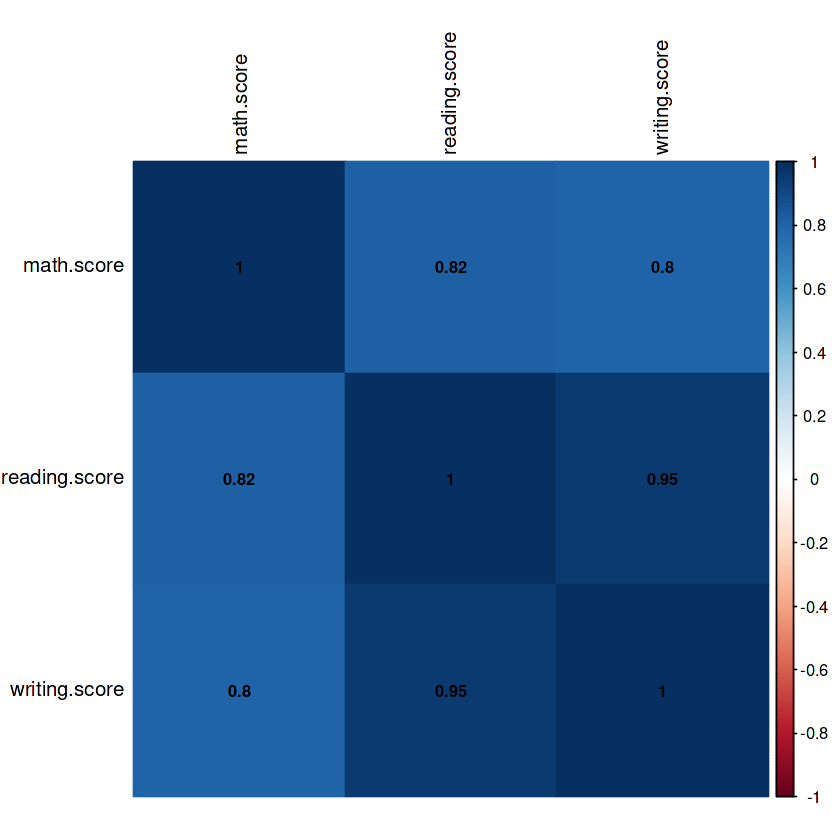

In [40]:
corr_mat <- cor(numeric_cols)
corrplot(corr_mat, method="color", addCoef.col="black", tl.col="black", number.cex=0.8)

### Categorical Columns Visualization

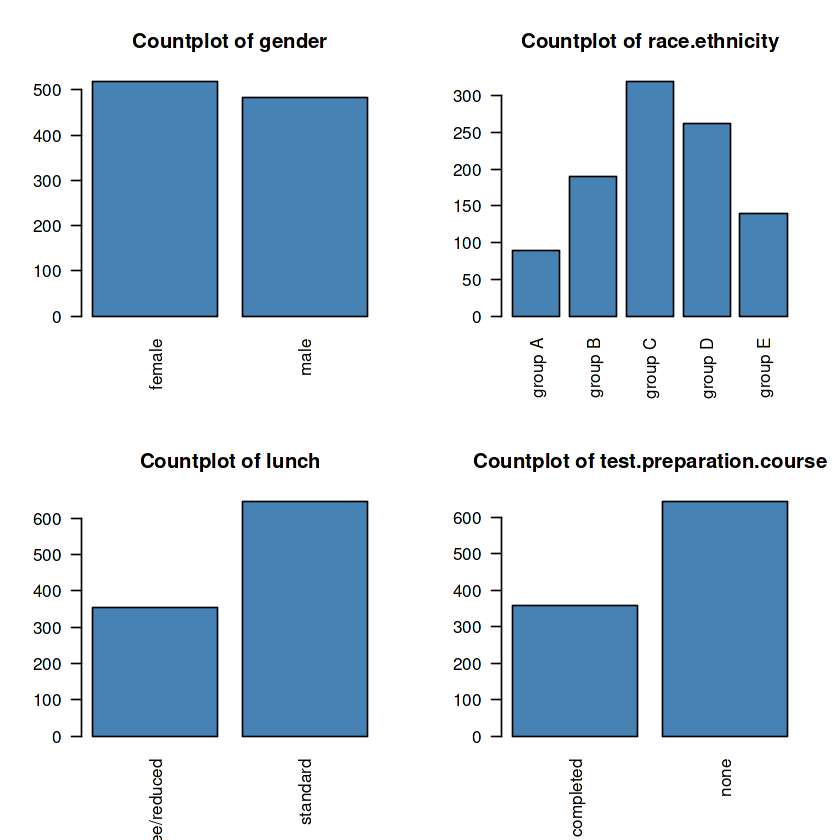

In [42]:
important_cat <- c("gender", "race.ethnicity", "lunch", "test.preparation.course")
par(mfrow=c(2,2))
for(col in important_cat){
  counts <- table(data[[col]])
  barplot(counts, main=paste("Countplot of", col), col="steelblue", las=2)
}

### Numerical Columns Visualization

#### Histogram + Density

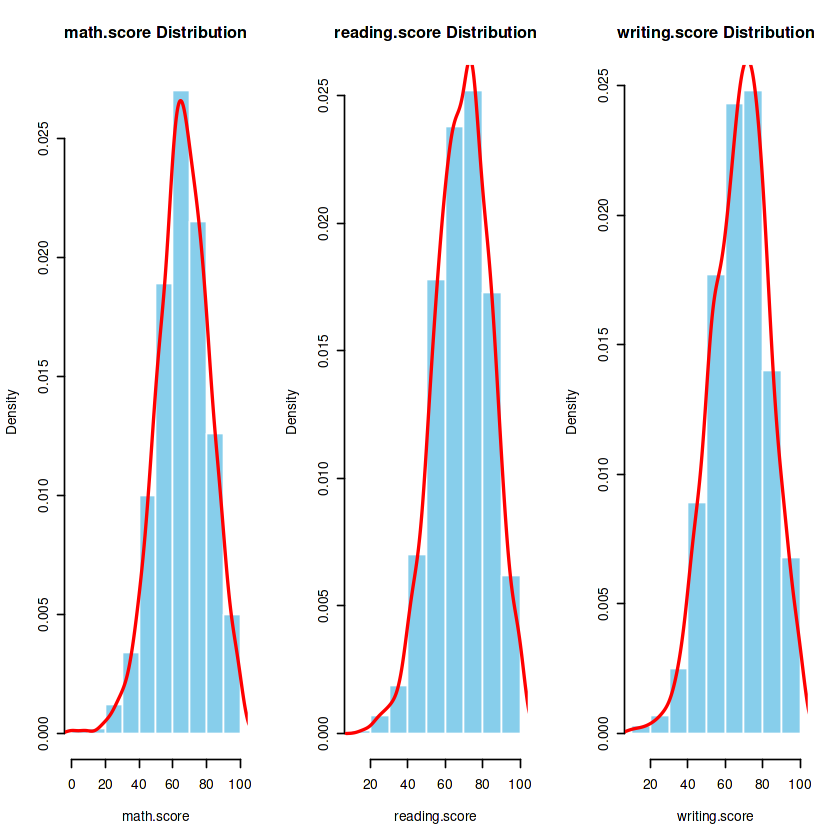

In [47]:
 par(mfrow=c(1,3))
for(col in colnames(numeric_cols)){
  hist(numeric_cols[[col]], 
       main=paste(col, "Distribution"), 
       xlab=col, 
       col="skyblue", 
       border="white", 
       probability = TRUE)
  
  lines(density(numeric_cols[[col]], na.rm=TRUE), col="red", lwd=2)
}

#### Violin + Boxplots

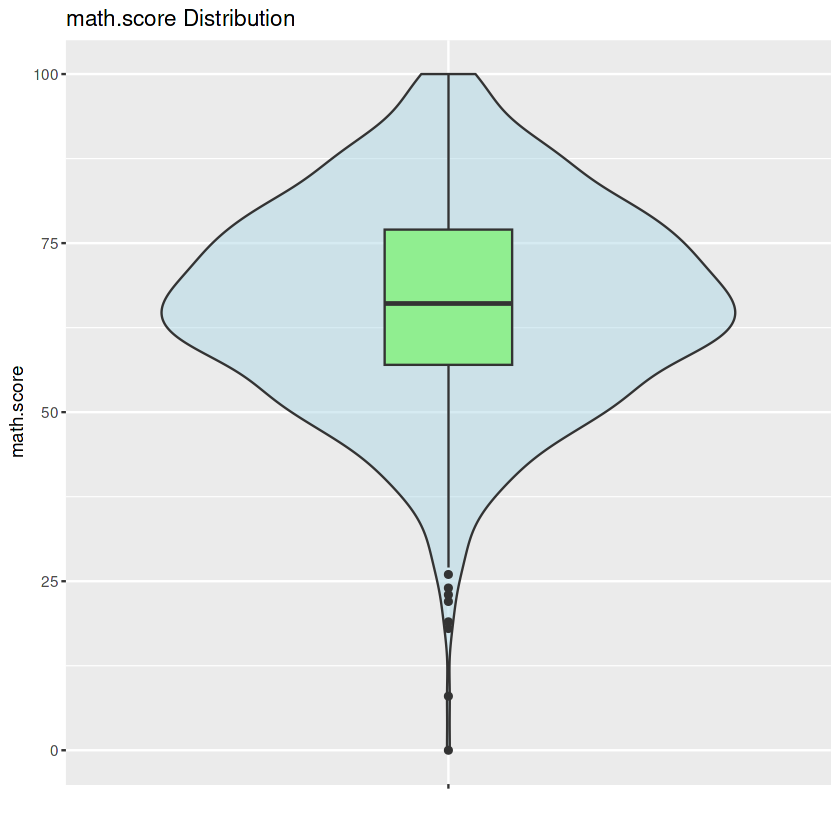

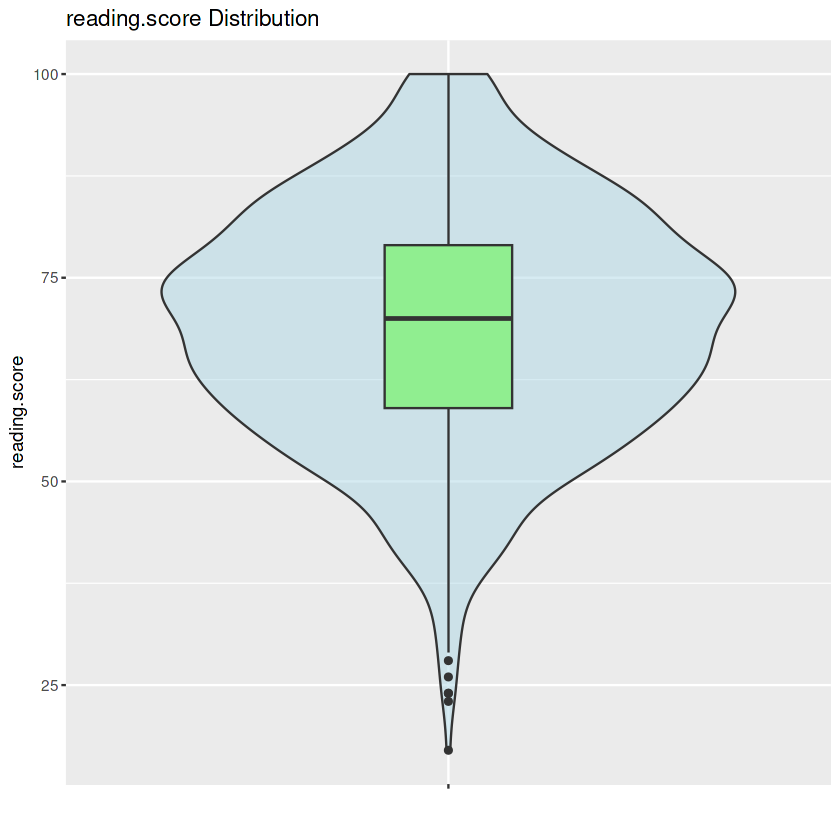

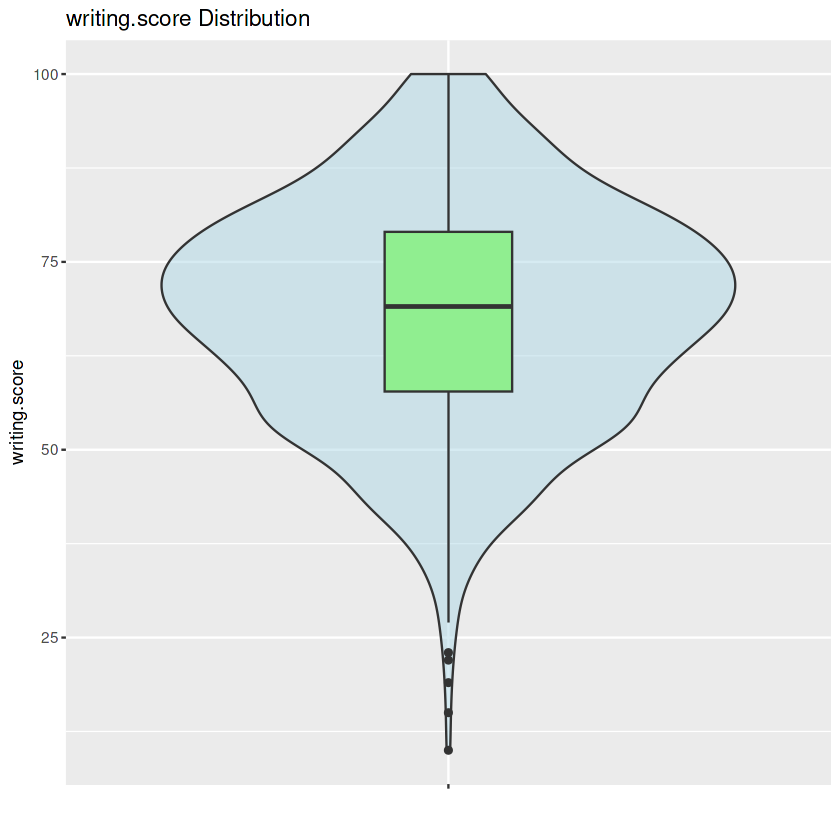

In [58]:
for(col in numeric_cols) {
  p <- ggplot(data, aes(x = "", y = .data[[col]])) +  
    geom_violin(fill = "lightblue", alpha = 0.5) +
    geom_boxplot(width = 0.2, fill = "lightgreen") +
    ggtitle(paste(col, "Distribution")) +
    ylab(col) +
    xlab("")    
  
  print(p)    
}

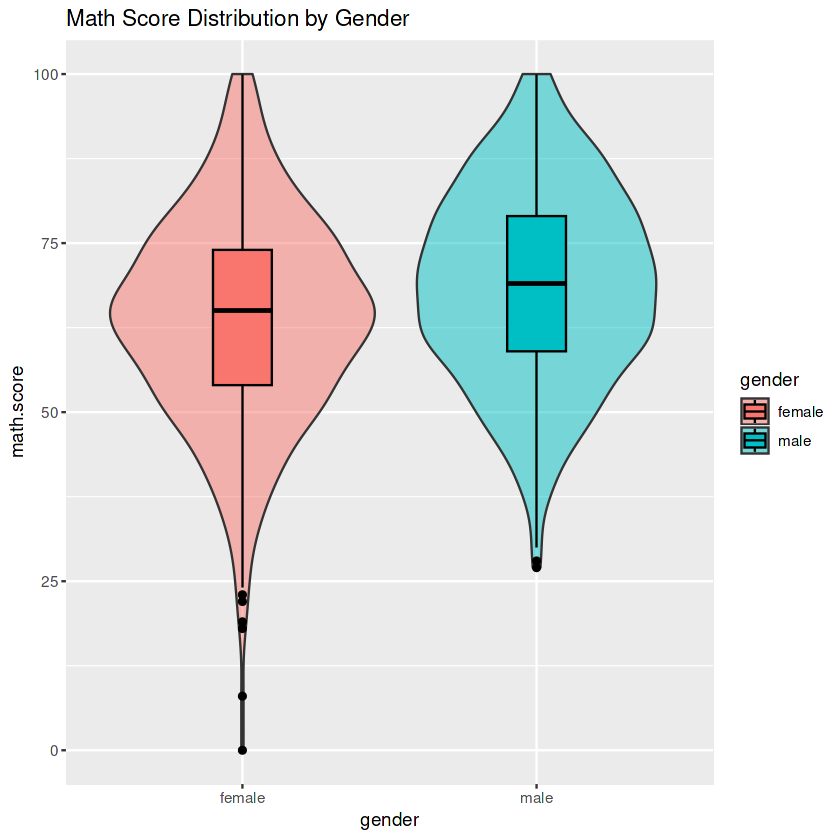

In [55]:
ggplot(data, aes(x = gender, y = math.score, fill = gender)) +
  geom_violin(alpha = 0.5) +
  geom_boxplot(width = 0.2, color="black") +
  ggtitle("Math Score Distribution by Gender")

### Grouped Visualizations

#### Average Math Score by Gender

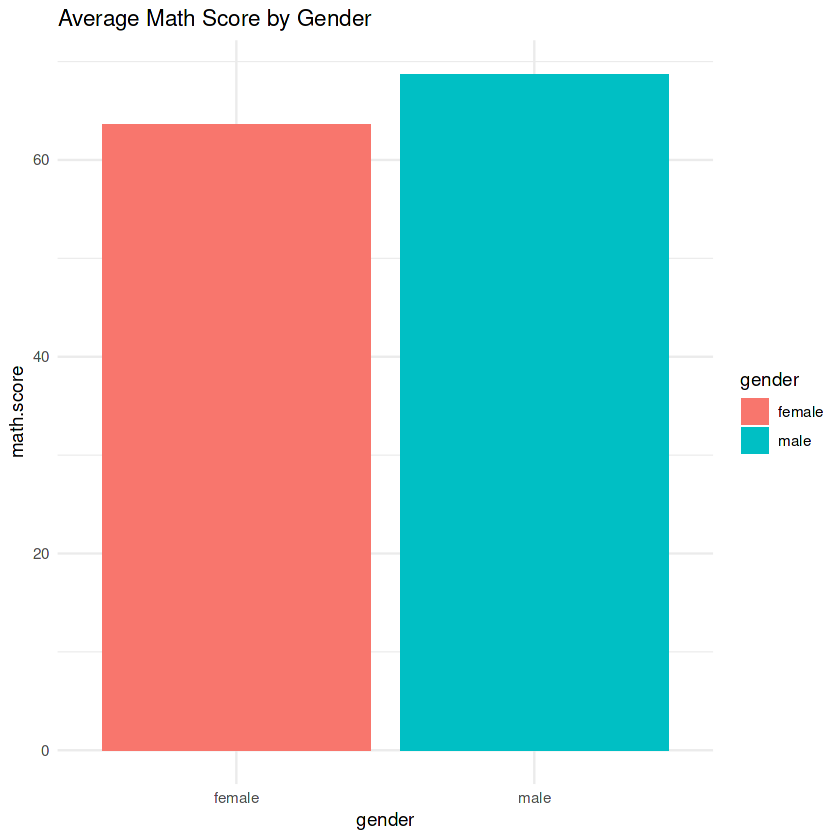

In [50]:
ggplot(data, aes(x=gender, y=`math.score`, fill=gender)) +
  stat_summary(fun="mean", geom="bar") +
  ggtitle("Average Math Score by Gender") +
  theme_minimal()

#### Reading Score by Lunch Type

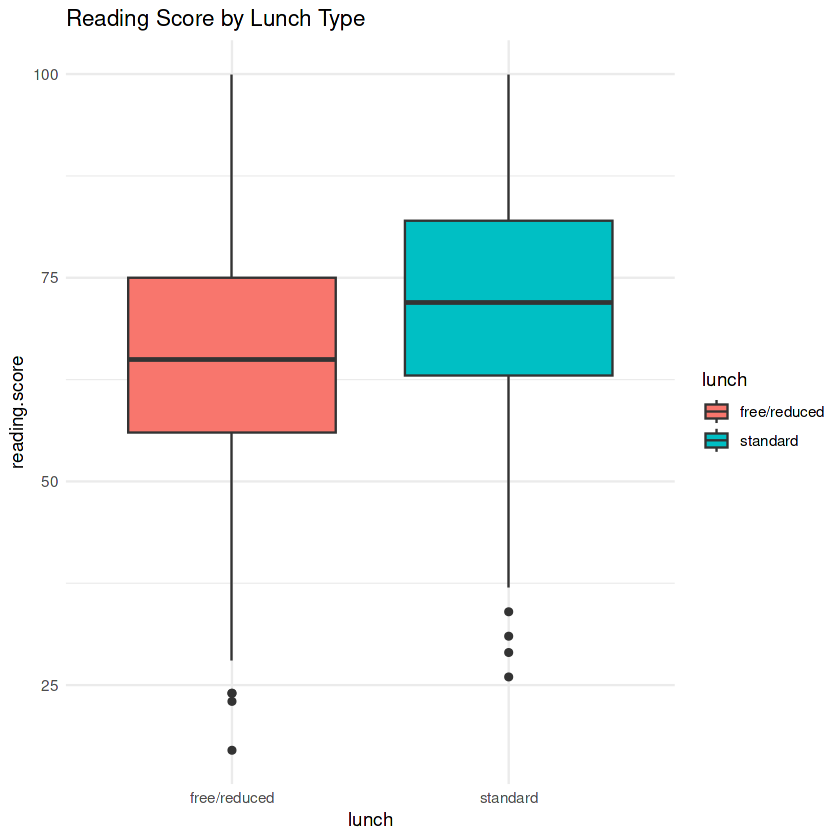

In [51]:
ggplot(data, aes(x=lunch, y=`reading.score`, fill=lunch)) +
  geom_boxplot() +
  ggtitle("Reading Score by Lunch Type") +
  theme_minimal()

### Pairwise Relationships

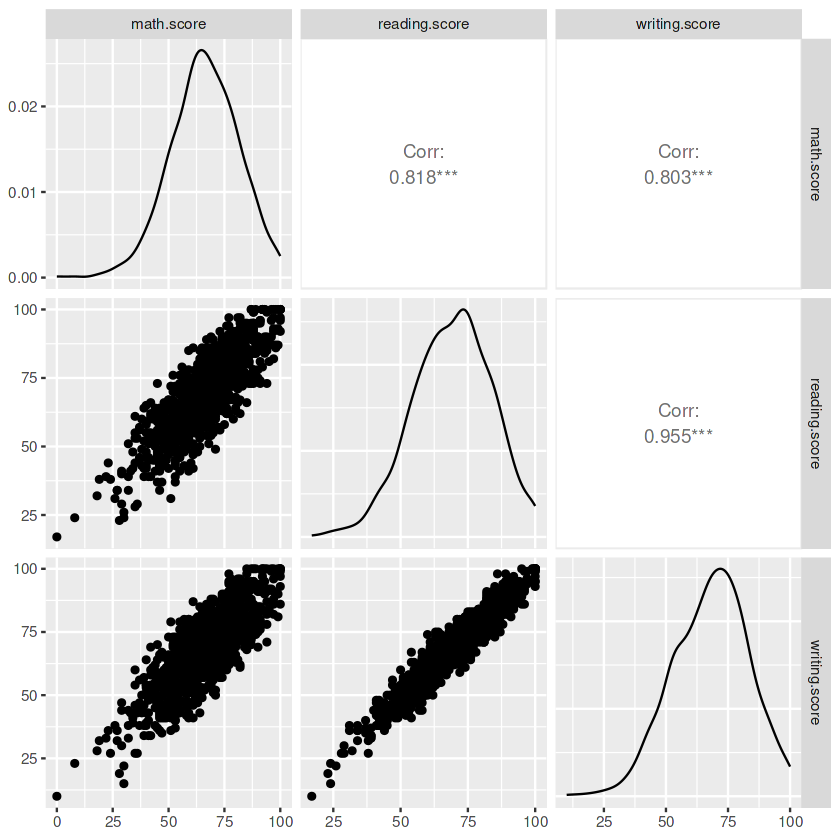

In [60]:
GGally::ggpairs(data %>% select(`math.score`, `reading.score`, `writing.score`))